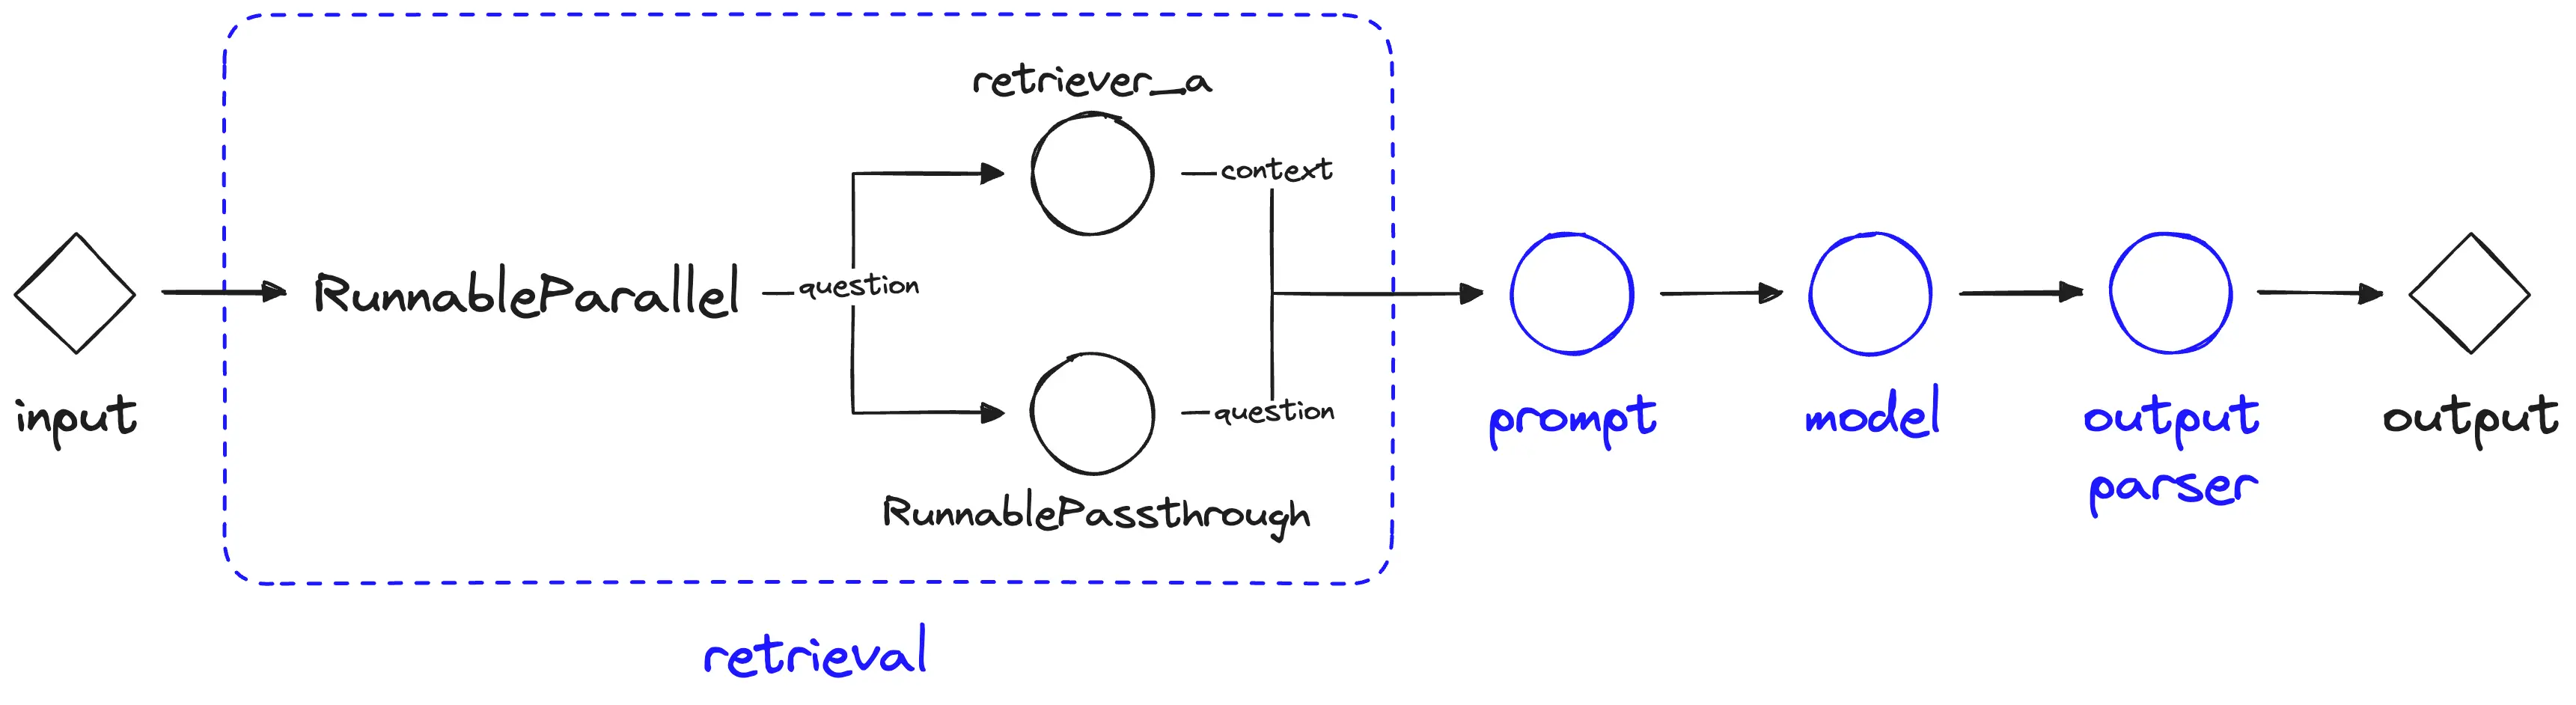

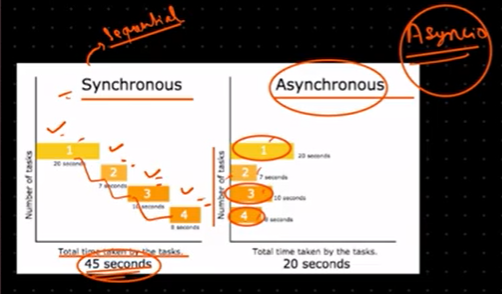

Transitioning from Old class to New Pipe Base Operator

1. Understanding Runnables
Runnables are self-contained units of work.
Can be executed in isolation or combined for complex operations.
Provides flexibility in execution (sync, async, parallel).

2. RunnableParallel
Executes tasks concurrently.
Useful for performance enhancement in scenarios where tasks can run independently.
Syntax example:
from some_module import RunnableParallel

3. RunnablePassthrough
A simple Runnable that passes inputs directly to outputs without modification.
Helpful for debugging or chaining in pipelines.
Example use case:
from some_module import RunnablePassthrough
passthrough = RunnablePassthrough()
result = passthrough.run(input_data)

4. RunnableLambda
Allows quick, inline definitions of small, custom functions.
Example:
from some_module import RunnableLambda
lambda_op = RunnableLambda(lambda x: x * 2)
result = lambda_op.run(5)  # Output: 10

5. Assign Functions
Used to assign values or parameters during execution.
Useful in data pipelines to update intermediate values.

6. Performance Improvement (Inference Speed)
Focus on optimizing the inference speed by leveraging parallel execution.
Use RunnableParallel or batching techniques.
Consider optimizing data pipelines by removing unnecessary steps.

7. Async Invoke
Executes operations asynchronously, improving the overall throughput of the system.
Syntax example:
async def async_operation():
    result = await some_async_function()

8. Batch Support
Handles multiple inputs at once to improve performance.
Can be combined with RunnableParallel for parallel batch execution.

9. Async Batch Execution
Combines asynchronous execution with batch processing for high-performance tasks.
Reduces overall execution time for larger datasets.

10. Using Itemgetter with LCEL
Itemgetter is used to extract specific items from collections.
When combined with LCEL (LangChain Execution Layer), it can streamline complex operations.

11. Bind Tools
Bind tools help to connect different steps in the pipeline.
Ensures smooth data flow between various Runnable components.

12. Stream Support
Keep your pipelines more responsive by incorporating stream support for data.
This allows continuous data processing and near real-time outputs.

In [1]:
import os
from dotenv import load_dotenv
load_dotenv()
os.environ["GROQ_API_KEY"]=os.getenv("GROQ_API_KEY")
GOOGLE_API_KEY=os.getenv('GEMINI_API_KEY')
os.environ["GOOGLE_API_KEY"]=GOOGLE_API_KEY

In [2]:
from langchain_google_genai import GoogleGenerativeAIEmbeddings
embeddings = GoogleGenerativeAIEmbeddings(model="models/embedding-001")
from langchain_google_genai import ChatGoogleGenerativeAI
llm = ChatGoogleGenerativeAI(model="gemini-1.0-pro")

In [3]:
'''from langchain_huggingface import HuggingFaceEmbeddings
embeddings=HuggingFaceEmbeddings(model_name="all-MiniLM-L6-v2")
from langchain_groq import ChatGroq
import os
llm=ChatGroq(model_name="Gemma2-9b-It")'''

'from langchain_huggingface import HuggingFaceEmbeddings\nembeddings=HuggingFaceEmbeddings(model_name="all-MiniLM-L6-v2")\nfrom langchain_groq import ChatGroq\nimport os\nllm=ChatGroq(model_name="Gemma2-9b-It")'

In [4]:
template= 'Hi! I am learning {skill}. Can you suggest me top 5 things to learn?\n'

In [5]:
from langchain import PromptTemplate
prompt = PromptTemplate(template=template,input_variables=["skill"])

In [6]:
prompt

PromptTemplate(input_variables=['skill'], input_types={}, partial_variables={}, template='Hi! I am learning {skill}. Can you suggest me top 5 things to learn?\n')

In [7]:
from langchain import LLMChain

In [9]:
llm_chain = LLMChain(prompt=prompt,llm=llm)

C:\Users\lenovo\AppData\Local\Temp\ipykernel_13636\1468533329.py:1: LangChainDeprecationWarning: The class `LLMChain` was deprecated in LangChain 0.1.17 and will be removed in 1.0. Use :meth:`~RunnableSequence, e.g., `prompt | llm`` instead.
  llm_chain = LLMChain(prompt=prompt,llm=llm)


In [10]:
print(llm_chain.run('Data Science'))

C:\Users\lenovo\AppData\Local\Temp\ipykernel_13636\421977066.py:1: LangChainDeprecationWarning: The method `Chain.run` was deprecated in langchain 0.1.0 and will be removed in 1.0. Use :meth:`~invoke` instead.
  print(llm_chain.run('Data Science'))


**Top 5 Essential Skills for Data Science:**

1. **Programming:** Python or R are the primary programming languages used in data science. Develop proficiency in data manipulation, analysis, and visualization.

2. **Statistics and Probability:** Understand fundamental concepts such as hypothesis testing, probability distributions, and regression analysis. These provide a strong foundation for data interpretation and modeling.

3. **Machine Learning:** Learn supervised and unsupervised learning algorithms, such as linear regression, decision trees, and clustering. This enables you to build predictive models and make data-driven decisions.

4. **Data Wrangling and Visualization:** Master techniques for cleaning, transforming, and visualizing data. Effective data visualization helps identify patterns, trends, and outliers.

5. **Cloud Computing Platforms:** Gain familiarity with platforms like AWS or Azure. These provide scalable and cost-effective infrastructure for storing, processing, a

In [11]:
llm_chain.run({'skill':'Data Science'})

'1. **Python or R Programming:** Proficiency in a programming language like Python or R is essential for data manipulation, analysis, and visualization.\n\n2. **Data Science Mathematics:** Understand fundamental mathematical concepts such as linear algebra, probability theory, and statistics to build and interpret statistical models.\n\n3. **Data Wrangling and Manipulation:** Master techniques for cleaning, transforming, and preparing raw data into a usable format for analysis.\n\n4. **Statistical Modeling:** Learn various statistical models, such as linear regression, logistic regression, and decision trees, to extract insights and make predictions from data.\n\n5. **Data Visualization:** Develop skills in visualizing data effectively using tools like Matplotlib, Seaborn, and Tableau to communicate insights and support decision-making.'

this is a implementation  using LCEL (langchain expression language)

In [12]:
llm

ChatGoogleGenerativeAI(model='models/gemini-1.0-pro', google_api_key=SecretStr('**********'), client=<google.ai.generativelanguage_v1beta.services.generative_service.client.GenerativeServiceClient object at 0x00000236627A95D0>, default_metadata=())

In [13]:
prompt

PromptTemplate(input_variables=['skill'], input_types={}, partial_variables={}, template='Hi! I am learning {skill}. Can you suggest me top 5 things to learn?\n')

In [14]:
chain = prompt | llm

In [15]:
chain.invoke({'skill':'Big Data'})

AIMessage(content='**Top 5 Things to Learn in Big Data:**\n\n1. **Data Management Tools:** Become proficient in tools like Hadoop, Spark, and NoSQL databases (e.g., MongoDB, Cassandra) for storing, processing, and managing large datasets.\n\n2. **Data Analytics Techniques:** Master data analysis techniques such as statistical modeling, machine learning, and predictive analytics to extract meaningful insights from Big Data.\n\n3. **Cloud Computing Platforms:** Understand cloud platforms like AWS, Azure, or GCP for deploying and scaling Big Data applications and infrastructure.\n\n4. **Data Visualization:** Learn data visualization tools like Tableau, Power BI, and ggplot2 to effectively communicate data insights and patterns to stakeholders.\n\n5. **Data Governance and Security:** Implement data governance principles and security measures to ensure data integrity, privacy, and compliance in Big Data environments.', additional_kwargs={}, response_metadata={'prompt_feedback': {'block_reas

In [16]:
from langchain_core.output_parsers import StrOutputParser

In [17]:
parser = StrOutputParser()

In [18]:
chain = prompt | llm | parser

In [19]:
chain.invoke({'skill':'Machine Learning'})

'**Top 5 Things to Learn in Machine Learning:**\n\n1. **Supervised Learning:**\n   - Understanding different supervised learning algorithms (e.g., linear regression, logistic regression, decision trees)\n   - Model selection, evaluation, and optimization\n\n2. **Unsupervised Learning:**\n   - Clustering algorithms (e.g., k-means, hierarchical clustering)\n   - Dimensionality reduction techniques (e.g., PCA, LDA)\n\n3. **Feature Engineering:**\n   - Transforming raw data into meaningful features\n   - Feature selection and extraction techniques\n\n4. **Model Evaluation and Optimization:**\n   - Metrics for assessing model performance (e.g., accuracy, precision, recall)\n   - Techniques for hyperparameter tuning and regularization\n\n5. **Machine Learning Libraries and Frameworks:**\n   - Familiarity with popular libraries such as TensorFlow, PyTorch, and scikit-learn\n   - Understanding the capabilities and limitations of these tools'

In [20]:
from langchain_core.runnables import RunnableParallel, RunnablePassthrough , RunnableLambda

In [21]:
chain = RunnablePassthrough()

In [22]:
chain.invoke('Welcome to this youtube channel')

'Welcome to this youtube channel'

In [23]:
chain = RunnablePassthrough() | RunnablePassthrough() | RunnablePassthrough()

In [24]:
chain.invoke('Welcome to my sam\"s youtube channel')

'Welcome to my sam"s youtube channel'

In [25]:
def string_upper(input_):
    return input_.upper()

In [26]:
chain = RunnablePassthrough() | RunnableLambda(string_upper)

In [27]:
chain.invoke('Welcome to my sam\"s youtube channel')

'WELCOME TO MY SAM"S YOUTUBE CHANNEL'

In [28]:
chain = RunnableParallel({'x':RunnablePassthrough(),'y':RunnablePassthrough()})

In [29]:
chain.invoke("Sam")

{'x': 'Sam', 'y': 'Sam'}

In [30]:
chain.invoke({'Youtube': '@samsstudio','Blog': "sam's blog"})

{'x': {'Youtube': '@samsstudio', 'Blog': "sam's blog"},
 'y': {'Youtube': '@samsstudio', 'Blog': "sam's blog"}}

In [31]:
lambda x: x['Blog']

<function __main__.<lambda>(x)>

In [32]:
chain = RunnableParallel({'x':RunnablePassthrough(),'Blog':lambda x: x['Blog']})

In [33]:
chain.invoke({'Youtube': '@samsstudio','Blog': "Sam's blog"})

{'x': {'Youtube': '@samsstudio', 'Blog': "Sam's blog"}, 'Blog': "Sam's blog"}

In [34]:
def fetch_website(input_: dict):
    output = input_.get('Website','Not found')
    return output

In [35]:
mydict={'Youtube': '@samsstudio','Blog':" Sam's blog"}

In [36]:
mydict.get("website","Not found")

'Not found'

In [37]:
chain = RunnableParallel({'Website':RunnablePassthrough() | RunnableLambda(fetch_website),'Blog':lambda z: z['Blog']})

In [39]:
chain.invoke({'Youtube': '@samsstudio','Blog': "Sam's blog"})

{'Website': 'Not found', 'Blog': "Sam's blog"}

In [40]:
chain.invoke({'Youtube': '@samsstudio','Blog': "Sam's blog" , 'Website' : 'cphy.ai'})

{'Website': 'cphy.ai', 'Blog': "Sam's blog"}

In [41]:
def extra_func(input):
    return 'Happy Learning'

In [42]:
chain = RunnableParallel({'x' : RunnablePassthrough()}).assign(extra=RunnableLambda(extra_func))

In [43]:
chain = RunnableParallel({'x' : RunnablePassthrough()}).assign(y=RunnableLambda(extra_func))

In [44]:
chain.invoke('Hello')

{'x': 'Hello', 'y': 'Happy Learning'}

In [45]:
from langchain_community.document_loaders import TextLoader, DirectoryLoader
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain_community.vectorstores import Chroma

In [46]:
loader = DirectoryLoader('source', glob="./*.txt", loader_cls=TextLoader)

In [47]:
docs = loader.load()

In [48]:
docs

[Document(metadata={'source': 'source\\data.txt'}, page_content='Unleashing the Power of LangChain Expression Language (LCEL): from proof of concept to production\nFrom proof of concept to production\nTom Darmon\nArtefact Engineering and Data Science\nTom Darmon\n\n·\nFollow\n\nPublished in\nArtefact Engineering and Data Science\n\n·\n10 min read\n·\nJan 25, 2024\n1.98K\n\nTL;DR\nFaster POC to prod : As langchain documentation describes it, “LCEL is a declarative way to easily compose chains together. LCEL was designed from day 1 to support putting prototypes in production, with no code change”.\nCustom chain creation: LCEL simplifies the process of creating custom chains with a new syntax.\nOut of the box streaming and batch: LCEL gives you batch, streaming and async capabilities for free.\nUnified interface: It offers automatic parallelization, typing capabilities, and any future feature LangChain might develop.\nLCEL is the future of LangChain: LCEL provides a fresh perspective on L

In [57]:
### Creating Chunks using RecursiveCharacterTextSplitter

text_splitter = RecursiveCharacterTextSplitter(
    chunk_size=100,
    chunk_overlap=10,
    length_function=len
    )



In [58]:
text_splitter

In [84]:
new_docs = text_splitter.split_documents(documents=docs)
doc_strings = [doc.page_content for doc in new_docs]

In [85]:
new_docs

[Document(metadata={'source': 'source\\data.txt'}, page_content='Unleashing the Power of LangChain Expression Language (LCEL): from proof of concept to production'),
 Document(metadata={'source': 'source\\data.txt'}, page_content='From proof of concept to production\nTom Darmon\nArtefact Engineering and Data Science\nTom Darmon'),
 Document(metadata={'source': 'source\\data.txt'}, page_content='·\nFollow\n\nPublished in\nArtefact Engineering and Data Science\n\n·\n10 min read\n·\nJan 25, 2024\n1.98K'),
 Document(metadata={'source': 'source\\data.txt'}, page_content='TL;DR'),
 Document(metadata={'source': 'source\\data.txt'}, page_content='Faster POC to prod : As langchain documentation describes it, “LCEL is a declarative way to easily'),
 Document(metadata={'source': 'source\\data.txt'}, page_content='to easily compose chains together. LCEL was designed from day 1 to support putting prototypes in'),
 Document(metadata={'source': 'source\\data.txt'}, page_content='in production, with n

In [61]:
doc_strings

['Unleashing the Power of LangChain Expression Language (LCEL): from proof of concept to production',
 'From proof of concept to production\nTom Darmon\nArtefact Engineering and Data Science\nTom Darmon',
 '·\nFollow\n\nPublished in\nArtefact Engineering and Data Science\n\n·\n10 min read\n·\nJan 25, 2024\n1.98K',
 'TL;DR',
 'Faster POC to prod : As langchain documentation describes it, “LCEL is a declarative way to easily',
 'to easily compose chains together. LCEL was designed from day 1 to support putting prototypes in',
 'in production, with no code change”.',
 'Custom chain creation: LCEL simplifies the process of creating custom chains with a new syntax.',
 'Out of the box streaming and batch: LCEL gives you batch, streaming and async capabilities for',
 'for free.',
 'Unified interface: It offers automatic parallelization, typing capabilities, and any future feature',
 'feature LangChain might develop.',
 'LCEL is the future of LangChain: LCEL provides a fresh perspective on LLM

In [62]:
from langchain.embeddings import HuggingFaceBgeEmbeddings

In [63]:
model_name = "BAAI/bge-base-en-v1.5"
model_kwargs = {'device': 'cpu'}
encode_kwargs = {'normalize_embeddings': True} # set True to compute cosine similarity\n",
embeddings = HuggingFaceBgeEmbeddings(
    model_name=model_name,
    model_kwargs=model_kwargs,
    encode_kwargs=encode_kwargs,
)

C:\Users\lenovo\AppData\Local\Temp\ipykernel_13636\1007747003.py:4: LangChainDeprecationWarning: The class `HuggingFaceBgeEmbeddings` was deprecated in LangChain 0.2.2 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-huggingface package and should be used instead. To use it run `pip install -U :class:`~langchain-huggingface` and import as `from :class:`~langchain_huggingface import HuggingFaceEmbeddings``.
  embeddings = HuggingFaceBgeEmbeddings(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

d:\a27_YEARS_OLD\RAG_ranking\venv\Lib\site-packages\huggingface_hub\file_download.py:140: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\lenovo\.cache\huggingface\hub\models--BAAI--bge-base-en-v1.5. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


config_sentence_transformers.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/94.6k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/52.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/777 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/366 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/711k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [86]:
db = Chroma.from_documents(new_docs, embeddings)


In [87]:
db

In [88]:
retriever = db.as_retriever(search_kwargs={"k": 4})

In [89]:
retriever

VectorStoreRetriever(tags=['Chroma', 'HuggingFaceBgeEmbeddings'], vectorstore=<langchain_community.vectorstores.chroma.Chroma object at 0x000002360A4C9A10>, search_kwargs={'k': 4})

In [90]:
template = """Answer the question based only on the following context:
        {context}
        Question: {question}
        """
prompt = PromptTemplate.from_template(template)


In [91]:
prompt

PromptTemplate(input_variables=['context', 'question'], input_types={}, partial_variables={}, template='Answer the question based only on the following context:\n        {context}\n        Question: {question}\n        ')

In [92]:
retrieval_chain = (
        RunnableParallel({"context": retriever, "question": RunnablePassthrough()})
        | prompt
        | llm
        | StrOutputParser()
        )


In [93]:
retrieval_chain

{
  context: VectorStoreRetriever(tags=['Chroma', 'HuggingFaceBgeEmbeddings'], vectorstore=<langchain_community.vectorstores.chroma.Chroma object at 0x000002360A4C9A10>, search_kwargs={'k': 4}),
  question: RunnablePassthrough()
}
| PromptTemplate(input_variables=['context', 'question'], input_types={}, partial_variables={}, template='Answer the question based only on the following context:\n        {context}\n        Question: {question}\n        ')
| ChatGoogleGenerativeAI(model='models/gemini-1.0-pro', google_api_key=SecretStr('**********'), client=<google.ai.generativelanguage_v1beta.services.generative_service.client.GenerativeServiceClient object at 0x00000236627A95D0>, default_metadata=())
| StrOutputParser()

In [94]:
question ="How to Unleashing the Power of LangChain Expression Language(lcel) ?"

In [95]:
retrieval_chain.invoke(question)

'The provided context does not contain any information about how to unleash the power of LangChain Expression Language (LCEL).'

In [96]:
import time

In [97]:
start_time = time.time()
result = retrieval_chain.invoke(question)
print('Time taken:',time.time() - start_time)

Time taken: 1.6529338359832764


In [98]:
start_time = time.time()
result = retrieval_chain.ainvoke(question)
print('Time taken:',time.time() - start_time)

Time taken: 0.0


In [ ]:
# ainvoke() appears to be a method that asynchronously invokes a retrieval chain, likely in the context of information retrieval, question answering, or natural language processing.
# Possible Functionality:
# The ainvoke() method might:
# Execute a series of processing steps or models in the retrieval chain.
# Pass input data (e.g., a question) through the retrieval chain to generate a response or retrieve relevant information.
# Return a result or response from the retrieval chain, possibly as a future or promise.
# Asynchronous Invocation:
# The a prefix in ainvoke() suggests that this method invokes the retrieval chain asynchronously, allowing the calling code to continue executing without blocking.

In [99]:
start_time = time.time()

batch_output = retrieval_chain.batch([
    "what is Custom chain creation ?",
    
    ])

print('Time taken:',time.time() - start_time)

Time taken: 2.7831287384033203


In [100]:
batch_output

['LCEL simplifies the process of creating custom chains with a new syntax.']

In [101]:
start_time = time.time()
batch_output = await retrieval_chain.abatch([
    "what is Custom chain creation ?"
    ])
print('Time taken:',time.time() - start_time)

Time taken: 3.1247916221618652


In [102]:
batch_output

['Custom chain creation is the process of creating custom chains. LCEL simplifies this process with a new syntax.']

In [103]:
mydict = {'Youtube': '@samsstudio','Blog': "Sam's blog" , 'Website' : 'cphy.ai'}

In [104]:
from operator import itemgetter

In [105]:
website = itemgetter('Website')

In [107]:
website(mydict)

'cphy.ai'

In [108]:
template = """Answer the question based only on the following context:
    {context}
    Question: {question}
    Answer in the following language: {language}"""


In [109]:
prompt = PromptTemplate.from_template(template)

In [110]:
retrieval_chain = (
    RunnableParallel({"context": itemgetter('question') | retriever,
                    "question": itemgetter('question'),
                    "language": itemgetter('language')
                    })
    | prompt
    | llm
    | StrOutputParser()
    )


In [111]:
### itemgetter only works with dictionaries , input has to be a dict
response = retrieval_chain.invoke({'question': "what is Custom chain creation ?",'language': "Spnish"})

In [112]:
response

' No puedo responder a la pregunta porque el contexto proporcionado no contiene información sobre qué es la creación de cadenas personalizadas en español.'

In [113]:
template = 'Hi! I am learning {skill}. Can you suggest me top 5 things to learn?'
prompt = PromptTemplate.from_template(template=template)
chain = prompt | llm

In [114]:
for s in chain.stream({'skill':'Big Data'}):
    print(s.content,end='')

**Top 5 Things to Learn for Big Data:**

1. **Data Management and Storage:**
   - Understand various data storage technologies (e.g., Hadoop Distributed File System, NoSQL databases)
   - Learn about data ingestion, processing, and transformation techniques

2. **Data Analysis and Visualization:**
   - Proficiency in data analysis tools (e.g., Apache Spark, SQL)
   - Expertise in data visualization techniques (e.g., Tableau, Power BI)
   - Ability to interpret and communicate data insights

3. **Cloud Computing:**
   - Familiarity with cloud platforms (e.g., AWS, Azure, GCP)
   - Understanding of cloud-based data processing services (e.g., EMR, Dataflow)
   - Experience with cloud data management and governance

4. **Machine Learning and AI:**
   - Knowledge of machine learning algorithms (e.g., regression, classification, clustering)
   - Ability to build and train machine learning models
   - Understanding of AI techniques for data analysis and prediction

5. **Data Security and Gove

In [115]:
import json
from langchain_core.messages import ToolMessage
from langchain_core.tools import tool
from langchain_core.utils.function_calling import convert_to_openai_tool

In [117]:
@tool
def multiply(first_number: int, second_number: int):
    '''Multiplies two numbers together'''
    return first_number * second_number

In [118]:
model_with_tools = llm.bind(tools=[convert_to_openai_tool(multiply)])

In [119]:
response = model_with_tools.invoke('What is 35 * 46?')

In [120]:
response

AIMessage(content='', additional_kwargs={'function_call': {'name': 'multiply', 'arguments': '{"second_number": 46.0, "first_number": 35.0}'}}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'safety_ratings': [{'category': 'HARM_CATEGORY_HATE_SPEECH', 'probability': 'NEGLIGIBLE', 'blocked': False}, {'category': 'HARM_CATEGORY_DANGEROUS_CONTENT', 'probability': 'NEGLIGIBLE', 'blocked': False}, {'category': 'HARM_CATEGORY_SEXUALLY_EXPLICIT', 'probability': 'NEGLIGIBLE', 'blocked': False}, {'category': 'HARM_CATEGORY_HARASSMENT', 'probability': 'NEGLIGIBLE', 'blocked': False}]}, id='run-09e1e415-0337-43cc-97a3-612c9abd1900-0', tool_calls=[{'name': 'multiply', 'args': {'second_number': 46.0, 'first_number': 35.0}, 'id': '1e2f434e-393c-4f6f-8866-33a047b9f8ac', 'type': 'tool_call'}], usage_metadata={'input_tokens': 65, 'output_tokens': 24, 'total_tokens': 89, 'input_token_details': {'cache_read': 0}})